In [1]:
import collections

import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt  # noqa
import torch.nn.functional as F  # noqa

torch.manual_seed(123)

In [2]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [3]:
from torchvision import datasets, transforms

data_path = "../data/p1ch7"
cifar10 = datasets.CIFAR10(
    data_path,
    train=True,
    download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
            (0.4915, 0.4823, 0.4468),
            (0.2470, 0.2435, 0.2616),
        )
    ])
)

cifar10_val = datasets.CIFAR10(
    data_path,
    train=False,
    download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
            (0.4915, 0.4823, 0.4468),
            (0.2470, 0.2435, 0.2616),
        )
    ])
)

In [4]:
label_map = {0: 0, 2: 1}

cifar2 = [
    (img, label_map[label])
    for img, label in cifar10
    if label in label_map
]

cifar2_val = [
    (img, label_map[label])
    for img, label in cifar10_val
    if label in label_map
]

In [5]:
connected_model = nn.Sequential(
    nn.Linear(3 * 32 * 32, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2)
)

In [6]:
numel_list = [
    p.numel() for p in connected_model.parameters()
    if p.requires_grad == True
]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [7]:
first_model = nn.Sequential(
    nn.Linear(3 * 32 * 32, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

In [8]:
numel_list = [
    p.numel() for p in first_model.parameters()
    if p.requires_grad == True
]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

In [9]:
linear = nn.Linear(3 * 32 * 32, 1024)
linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

In [20]:
conv = nn.Conv2d(3, 16, kernel_size=3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [21]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [22]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape  # (32 - 3) / 1 + 1, (size - kernel size) / stride + 1

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

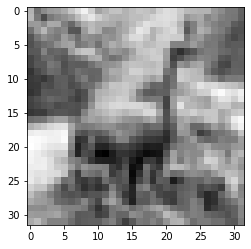

In [23]:
plt.imshow(img.mean(0), cmap="gray")

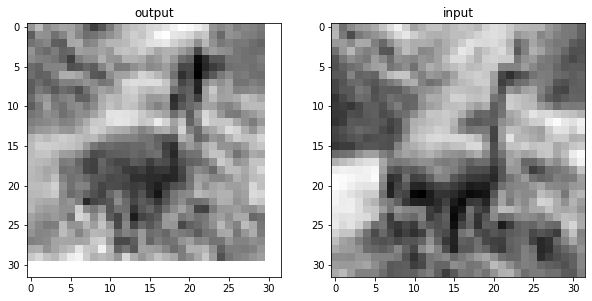

In [35]:
plt.figure(figsize=(10, 4.8))
ax1 = plt.subplot(1, 2, 1)
plt.title("output")
plt.imshow(output[0, 0].detach(), cmap="gray")
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
plt.imshow(img.mean(0), cmap="gray")
plt.title("input")
plt.savefig("../data/p1ch8/Ch8_F2_PyTorch.png")
plt.show()

In [36]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [38]:
with torch.no_grad():
    conv.bias.zero_()

with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

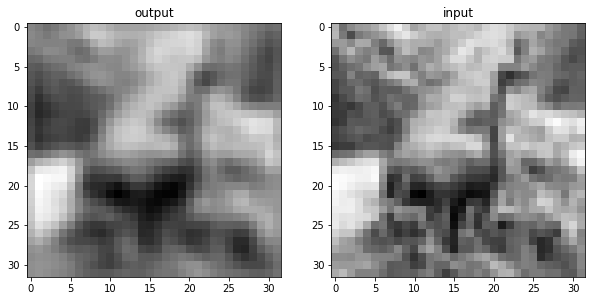

In [40]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))
ax1 = plt.subplot(1, 2, 1)
plt.title("output")
plt.imshow(output[0, 0].detach(), cmap="gray")
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
plt.imshow(img.mean(0), cmap="gray")
plt.title("input")
plt.savefig("../data/p1ch8/Ch8_F4_PyTorch.png")
plt.show()

In [41]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
with torch.no_grad():
    conv.weight[:] = torch.tensor([
        [-1.0, 0.0, 1.0],
        [-1.0, 0.0, 1.0],
        [-1.0, 0.0, 1.0],
    ])
    conv.bias.zero_()

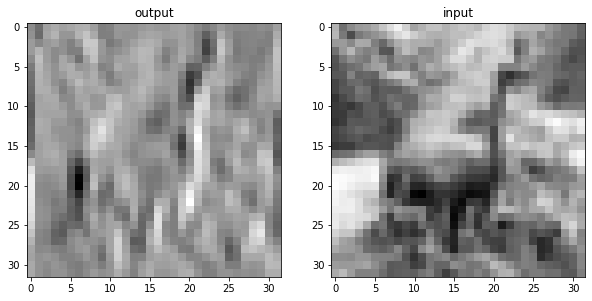

In [42]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))
ax1 = plt.subplot(1, 2, 1)
plt.title("output")
plt.imshow(output[0, 0].detach(), cmap="gray")
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
plt.imshow(img.mean(0), cmap="gray")
plt.title("input")
plt.savefig("../data/p1ch8/Ch8_F5_PyTorch.png")
plt.show()

In [43]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [44]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 8, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Linear(8 * 8 * 8, 32),
    nn.Tanh(),
    nn.Linear(32, 2)
)

In [45]:
numel_list = [
    p.numel() for p in model.parameters()
]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [50]:
model(img.unsqueeze(0))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x8 and 512x32)

In [52]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [53]:
model = Net()

numel_list = [
    p.numel() for p in model.parameters()
]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [58]:
class Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [59]:
model = Net()
model(img.unsqueeze(0))

tensor([[-0.0750, -0.1001]], grad_fn=<AddmmBackward0>)

In [61]:
import datetime


def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0

        for imgs, labels in train_loader:
            outputs = model(imgs)

            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print(f"{datetime.datetime.now()} Epoch {epoch}, Training loss {loss_train / len(train_loader)}")

In [63]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)  # noqa

model = Net()
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader
)

2022-05-04 10:20:22.164687 Epoch 1, Training loss 0.6076761091211039
2022-05-04 10:20:42.256244 Epoch 10, Training loss 0.3322148189233367
2022-05-04 10:21:04.529513 Epoch 20, Training loss 0.2941013639140281
2022-05-04 10:21:26.821040 Epoch 30, Training loss 0.26660410101246684
2022-05-04 10:21:49.101454 Epoch 40, Training loss 0.24309701671835723
2022-05-04 10:22:11.360118 Epoch 50, Training loss 0.22502346035496446
2022-05-04 10:22:33.632528 Epoch 60, Training loss 0.21036359084070108
2022-05-04 10:22:55.854383 Epoch 70, Training loss 0.194760426973841
2022-05-04 10:23:18.184875 Epoch 80, Training loss 0.18129826009653177
2022-05-04 10:23:40.449292 Epoch 90, Training loss 0.16651821715436924
2022-05-04 10:24:02.812087 Epoch 100, Training loss 0.1520087287114684


In [65]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)  # noqa
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)  # noqa


def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
        print("Accuracy {}: {:.2f}".format(name, correct / total))


validate(model, train_loader, val_loader)


Accuracy train: 0.94
Accuracy val: 0.88


In [66]:
torch.save(model.state_dict(), data_path + "birds_vs_airplanes.pt")

In [67]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load(data_path + "birds_vs_airplanes.pt"))

<All keys matched successfully>

In [68]:
device = (torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu"))
print(f"Training on device {device}")

Training on device cuda


In [70]:
import datetime


def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print(f"{datetime.datetime.now()} Epoch {epoch}, Training loss {loss_train / len(train_loader)}")

In [71]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)  # noqa

model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader
)

2022-05-04 11:21:01.252011 Epoch 1, Training loss 0.5761018516911063
2022-05-04 11:21:04.213605 Epoch 10, Training loss 0.34739997214192797
2022-05-04 11:21:07.416919 Epoch 20, Training loss 0.29161951135677894
2022-05-04 11:21:10.637268 Epoch 30, Training loss 0.2678904130010848
2022-05-04 11:21:13.848556 Epoch 40, Training loss 0.24901979312205771
2022-05-04 11:21:17.071003 Epoch 50, Training loss 0.23399741406653338
2022-05-04 11:21:20.646092 Epoch 60, Training loss 0.22025143858163979
2022-05-04 11:21:24.139266 Epoch 70, Training loss 0.20580023247155416
2022-05-04 11:21:27.545493 Epoch 80, Training loss 0.19211606629145372
2022-05-04 11:21:30.962355 Epoch 90, Training loss 0.17866936354500473
2022-05-04 11:21:34.234711 Epoch 100, Training loss 0.1621169422272664


In [72]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)  # noqa
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)  # noqa

all_acc_dict = collections.OrderedDict()


def validate(model, train_loader, val_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)  # <1>
                total += labels.shape[0]
                correct += int((predicted == labels).sum())

        print("Accuracy {}: {:.2f}".format(name, correct / total))
        accdict[name] = correct / total
    return accdict


all_acc_dict["baseline"] = validate(model, train_loader, val_loader)

Accuracy train: 0.94
Accuracy val: 0.89


In [73]:
class NetWidth(nn.Module):

    def __init__(self):
        super(NetWidth, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(16 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 16 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [74]:
model = NetWidth().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)

validate(model, train_loader, val_loader)

2022-05-04 11:28:20.400632 Epoch 1, Training loss 0.5366539983612717
2022-05-04 11:28:24.106976 Epoch 10, Training loss 0.3152259662272824
2022-05-04 11:28:28.076232 Epoch 20, Training loss 0.27453151781847523
2022-05-04 11:28:32.240328 Epoch 30, Training loss 0.24434029908886382
2022-05-04 11:28:36.200282 Epoch 40, Training loss 0.21628518231735108
2022-05-04 11:28:40.423236 Epoch 50, Training loss 0.18882140716549697
2022-05-04 11:28:44.467901 Epoch 60, Training loss 0.16360724978386218
2022-05-04 11:28:48.432633 Epoch 70, Training loss 0.1403088424188696
2022-05-04 11:28:52.409034 Epoch 80, Training loss 0.11890986336359552
2022-05-04 11:28:56.398071 Epoch 90, Training loss 0.09974460442592005
2022-05-04 11:29:00.382403 Epoch 100, Training loss 0.08253625649840209
Accuracy train: 0.96
Accuracy val: 0.89


{'train': 0.9623, 'val': 0.8925}

In [75]:
class NetWidth(nn.Module):
    def __init__(self, n_chan1=32):
        super().__init__()
        self.n_chan1 = n_chan1
        self.conv1 = nn.Conv2d(3, n_chan1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chan1, n_chan1 // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(n_chan1 // 2 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, self.n_chan1 // 2 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [77]:
model = NetWidth(n_chan1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader
)

all_acc_dict["width"] = validate(model, train_loader, val_loader)

2022-05-04 11:34:23.543619 Epoch 1, Training loss 0.5307100259574355
2022-05-04 11:34:27.144570 Epoch 10, Training loss 0.31469703527392856
2022-05-04 11:34:31.275271 Epoch 20, Training loss 0.27470001388507287
2022-05-04 11:34:35.579817 Epoch 30, Training loss 0.2460857501644997
2022-05-04 11:34:39.672170 Epoch 40, Training loss 0.2186312578191423
2022-05-04 11:34:43.773300 Epoch 50, Training loss 0.19157267888640142
2022-05-04 11:34:47.814381 Epoch 60, Training loss 0.16708340581245484
2022-05-04 11:34:51.818635 Epoch 70, Training loss 0.14484851826338252
2022-05-04 11:34:55.833649 Epoch 80, Training loss 0.12418887299147381
2022-05-04 11:34:59.838817 Epoch 90, Training loss 0.10497797389698636
2022-05-04 11:35:03.861846 Epoch 100, Training loss 0.0873141609084834
Accuracy train: 0.96
Accuracy val: 0.89


In [78]:
all_acc_dict

OrderedDict([('baseline', {'train': 0.9382, 'val': 0.8915}),
             ('width', {'train': 0.9628, 'val': 0.8935})])

In [79]:
def training_loop_l2reg(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            l2_lambda = 0.001
            l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
            loss = loss + l2_lambda * l2_norm

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print(f"{datetime.datetime.now()} Epoch {epoch}, Training loss {loss_train / len(train_loader)}")

In [80]:
model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop_l2reg(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader
)
all_acc_dict["l2 reg"] = validate(model, train_loader, val_loader)

2022-05-04 13:28:18.275525 Epoch 1, Training loss 0.5636968259598799
2022-05-04 13:28:22.541684 Epoch 10, Training loss 0.34892085536270384
2022-05-04 13:28:27.155554 Epoch 20, Training loss 0.31890647796688565
2022-05-04 13:28:31.822997 Epoch 30, Training loss 0.29643587132168425
2022-05-04 13:28:36.476651 Epoch 40, Training loss 0.2772100403620179
2022-05-04 13:28:41.073512 Epoch 50, Training loss 0.26194769865388323
2022-05-04 13:28:45.677214 Epoch 60, Training loss 0.24852274747411157
2022-05-04 13:28:50.253876 Epoch 70, Training loss 0.23678308953145508
2022-05-04 13:28:54.823595 Epoch 80, Training loss 0.2264788873066568
2022-05-04 13:28:59.472941 Epoch 90, Training loss 0.21705473940463582
2022-05-04 13:29:04.199503 Epoch 100, Training loss 0.20841106639546195
Accuracy train: 0.92
Accuracy val: 0.89


In [81]:
class NetDropout(nn.Module):
    def __init__(self, n_chan1):
        super(NetDropout, self).__init__()
        self.n_chan1 = n_chan1
        self.conv1 = nn.Conv2d(3, n_chan1, kernel_size=3, padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.4)
        self.conv2 = nn.Conv2d(n_chan1, n_chan1 // 2, kernel_size=3, padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(8 * 8 * n_chan1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.conv1_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = self.conv2_dropout(out)
        out = out.view(-1, 8 * 8 * self.n_chan1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [82]:
model = NetDropout(n_chan1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader
)
all_acc_dict["dropout"] = validate(model, train_loader, val_loader)

2022-05-04 13:34:44.132886 Epoch 1, Training loss 0.5690535995990608
2022-05-04 13:34:48.009471 Epoch 10, Training loss 0.3772642397007365
2022-05-04 13:34:52.257855 Epoch 20, Training loss 0.3487581947616711
2022-05-04 13:34:56.576990 Epoch 30, Training loss 0.3286482323506835
2022-05-04 13:35:00.874693 Epoch 40, Training loss 0.3150111365659981
2022-05-04 13:35:05.117568 Epoch 50, Training loss 0.30001709501075136
2022-05-04 13:35:09.465373 Epoch 60, Training loss 0.28881037396610165
2022-05-04 13:35:13.785027 Epoch 70, Training loss 0.27535398921389487
2022-05-04 13:35:18.328439 Epoch 80, Training loss 0.26124928113381574
2022-05-04 13:35:22.815121 Epoch 90, Training loss 0.2538549815583381
2022-05-04 13:35:27.485494 Epoch 100, Training loss 0.24430716768571525
Accuracy train: 0.90
Accuracy val: 0.87


In [100]:
class NetBatchNorm(nn.Module):
    def __init__(self, n_chan1):
        super().__init__()
        self.n_chan1 = n_chan1
        self.conv1 = nn.Conv2d(3, n_chan1, kernel_size=3, padding=1)
        self.conv1_batch_norm = nn.BatchNorm2d(num_features=n_chan1)
        self.conv2 = nn.Conv2d(n_chan1, n_chan1 // 2, kernel_size=3, padding=1)
        self.conv2_batch_norm = nn.BatchNorm2d(num_features=n_chan1 // 2)
        self.fc1 = nn.Linear(8 * 8 * n_chan1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.conv1_batch_norm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_batch_norm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = out.view(-1, 8 * 8 * self.n_chan1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [85]:
model = NetBatchNorm(n_chan1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader
)
all_acc_dict["batch norm"] = validate(model, train_loader, val_loader)

2022-05-04 13:38:25.538876 Epoch 1, Training loss 0.46719036929926294
2022-05-04 13:38:30.122446 Epoch 10, Training loss 0.27089019769885736
2022-05-04 13:38:35.094885 Epoch 20, Training loss 0.2103715699379611
2022-05-04 13:38:40.236809 Epoch 30, Training loss 0.16149247160098354
2022-05-04 13:38:45.331794 Epoch 40, Training loss 0.11889033823920662
2022-05-04 13:38:50.487261 Epoch 50, Training loss 0.08128844905098911
2022-05-04 13:38:55.310778 Epoch 60, Training loss 0.052972925364211866
2022-05-04 13:39:00.319974 Epoch 70, Training loss 0.04191789897692621
2022-05-04 13:39:05.118555 Epoch 80, Training loss 0.038534543218957204
2022-05-04 13:39:09.915422 Epoch 90, Training loss 0.01440606334922942
2022-05-04 13:39:15.050135 Epoch 100, Training loss 0.009024497744431542
Accuracy train: 0.99
Accuracy val: 0.88


In [96]:
class NetDepth(nn.Module):
    def __init__(self, n_chan1):
        super().__init__()
        self.n_chan1 = n_chan1
        self.conv1 = nn.Conv2d(3, n_chan1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chan1, n_chan1 // 2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(n_chan1 // 2, n_chan1 // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chan1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = F.max_pool2d(torch.tanh(self.conv3(out)), 2)
        out = out.view(-1, 4 * 4 * self.n_chan1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [101]:
model = NetDepth(n_chan1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader
)
all_acc_dict["depth"] = validate(model, train_loader, val_loader)

2022-05-04 14:03:33.778651 Epoch 1, Training loss 0.6576683278296404
2022-05-04 14:03:38.421006 Epoch 10, Training loss 0.35817441856785187
2022-05-04 14:03:43.498590 Epoch 20, Training loss 0.29754163239412246
2022-05-04 14:03:48.851072 Epoch 30, Training loss 0.2677251792922141
2022-05-04 14:03:53.861656 Epoch 40, Training loss 0.2390739726982299
2022-05-04 14:03:58.867420 Epoch 50, Training loss 0.210708108202667
2022-05-04 14:04:03.871658 Epoch 60, Training loss 0.18357715722481915
2022-05-04 14:04:08.896382 Epoch 70, Training loss 0.15913121656152854
2022-05-04 14:04:13.917280 Epoch 80, Training loss 0.1364768976049059
2022-05-04 14:04:18.928052 Epoch 90, Training loss 0.11550265072494935
2022-05-04 14:04:23.939844 Epoch 100, Training loss 0.0958654801272283
Accuracy train: 0.96
Accuracy val: 0.90


In [105]:
torch.save(model.state_dict(), data_path + "/birds_vs_airplanes.pt")